[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1s4QvKZAjWxq5bS_RlXmWtumctmDQy0Xb#scrollTo=VcC5MjRQ7S6P)

## YOLOv8 Object Detection Notebook

This project demonstrates the use of the YOLOv8 (You Only Look Once version 8) deep learning model for real-time object detection, specifically focusing on identifying birds within an image. The model is pre-trained on the COCO dataset, which supports detection of 80 common object categories.

The image used in this task, birds.jpg, is processed to:

Detect and label all objects with a confidence level greater than 50%.
Filter the results to display only objects classified as "bird" with a confidence level greater than 50%.
Visually present three output versions of the image:
The original image (for reference)
An image showing all high-confidence detections
An image showing only high-confidence bird detections

---
### Mount to Google Drive
Mount to your Google Drive to access the images and model files

In [2]:
# --------------------------------------
# Mount Google Drive to access image
# --------------------------------------

# This cell mounts your Google Drive to the Colab environment, allowing the notebook to access files stored there

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


---
### Set Image Path

In [3]:
# --------------------------------------
# Define the path to the input image
# --------------------------------------

# This variable stores the file path to the image located in your Google Drive that will be used for object detection

dataset_location = "/content/gdrive/MyDrive/Perform Object Detection (YOLOv8)/birds.jpg"

---
### Install Required Packages

In [4]:
# --------------------------------------
# Install required packages (YOLOv8 and OpenCV)
# --------------------------------------

# This command installs the necessary Python libraries:
# - ultralytics: Contains the YOLOv8 model implementation
# - opencv-python: OpenCV library for image processing tasks
# - matplotlib: For displaying images and plots
# The -q flag is used for a quiet installation

!pip install -q ultralytics opencv-python matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 28.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 59.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 33.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 51.9 MB/s eta 0:00:00


---
### Import Libraries

In [5]:
# --------------------------------------
# Import required libraries
# --------------------------------------

# These lines import the necessary Python libraries into the current environment for use in the notebook
# - os: Provides a way to interact with the operating system, like creating directories
# - cv2: The OpenCV library, used here for reading, writing, and manipulating images
# - numpy: A fundamental package for scientific computing with Python, often used in image processing for array operations
# - matplotlib.pyplot: Used for plotting and displaying images
# - google.colab.patches.cv2_imshow: A function provided by Colab to display OpenCV images correctly within the notebook

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO
from google.colab.patches import cv2_imshow

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


---
### Load Image & Create Copies

In [6]:
# ----------------------------------------
# Load original image for display and copying
# ----------------------------------------

# Reads the image from the specified path using OpenCV
# Creates two copies of the original image
# - image_all: Will be used to draw bounding boxes for all detected objects
# - image_bird: Will be used to draw bounding boxes only for detected birds
# This is done to display different sets of results without modifying the original image

original_image = cv2.imread(dataset_location)
image_with_all_detections = original_image.copy()      # For labeling all classes with conf > 0.5
image_with_bird_detections = original_image.copy()     # For labeling birds only

---
### Load YOLOv8 Model

In [7]:
# --------------------------------------
# Load the YOLOv8 pre-trained model (on COCO dataset)
# --------------------------------------

# Initializes a YOLO object with the 'yolov8n.pt' pre-trained weights
# 'yolov8n.pt' is a smaller, faster version of the YOLOv8 model
# You could use 'yolov8s.pt' or 'yolov8m.pt' for potentially better accuracy at the cost of speed

model = YOLO('yolov8n.pt')  # You can use 'yolov8s.pt' or 'yolov8m.pt' for better accuracy

100%|██████████| 6.25M/6.25M [00:00<00:00, 47.3MB/s]


---
### Perform Inference

In [8]:
# --------------------------------------
# Perform object detection on the image
# --------------------------------------

# Runs the loaded YOLOv8 model on the input image specified by dataset_location
# The results object contains the detection information, including bounding boxes, confidence scores, and class predictions

results = model(dataset_location)


image 1/1 /content/gdrive/MyDrive/Perform Object Detection (YOLOv8)/birds.jpg: 640x448 5 persons, 2 airplanes, 5 birds, 424.1ms
Speed: 22.7ms preprocess, 424.1ms inference, 30.3ms postprocess per image at shape (1, 3, 640, 448)


In [9]:
# --------------------------------------
# Load the original image using OpenCV
# --------------------------------------

# This line re-loads the original image. While it was loaded before, this ensures a fresh copy if needed later
# (though in this specific notebook, the copies 'image_all' and 'image_bird' are primarily used)

image = cv2.imread(dataset_location)

### Draw Bounding Boxes for All Objects (Confidence > 0.5)

In [10]:
# ----------------------------------------
# Draw bounding boxes for all objects (confidence > 0.5)
# ----------------------------------------

# This loop processes all detections from the YOLOv8 model output.
# It draws red bounding boxes around every detected object (regardless of class)
# if its confidence score exceeds 0.5.
# The label shows the object's class and confidence.

for detection_all in results:  # Iterate through detection result sets (typically 1 for single image)
    for box in detection_all.boxes:  # Iterate through each bounding box in the result
        confidence = float(box.conf)  # Extract confidence score

        # Proceed only if confidence is greater than 0.5
        if confidence > 0.5:
            # Extract bounding box coordinates (x1, y1, x2, y2)
            x1, y1, x2, y2 = [int(i) for i in box.xyxy[0]]

            # Get predicted class index and name from model
            class_index = int(box.cls)
            class_name = model.names[class_index]

            # Draw red bounding box around detected object
            cv2.rectangle(image_with_all_detections, (x1, y1), (x2, y2), (0, 0, 255), 2)

            # Prepare label text (e.g., person: 0.86)
            label = f"{class_name}: {confidence:.2f}"

            # Define font and label properties
            font = cv2.FONT_HERSHEY_SIMPLEX
            font_scale = 0.6
            thickness = 1
            text_color = (255, 255, 255)  # White text

            # Calculate label size for background rectangle
            (text_width, text_height), baseline = cv2.getTextSize(label, font, font_scale, thickness)

            # Adjust text position (above box or below if too close to top)
            text_x = x1
            text_y = y1 - 10 if y1 - 10 > text_height else y1 + text_height + 10

            # Draw background rectangle for text (filled red)
            cv2.rectangle(image_with_all_detections,
                          (text_x, text_y - text_height - baseline),
                          (text_x + text_width, text_y + baseline),
                          (0, 0, 255), -1)

            # Put the label text on top of the red rectangle
            cv2.putText(image_with_all_detections, label, (text_x, text_y), font, font_scale, text_color, thickness)

### Draw Bounding Boxes for Birds Only (Confidence > 0.5)

In [11]:
# This loop filters the YOLOv8 results to display only "bird" detections
# with a confidence score greater than 50%.
# The bounding box is drawn in blue and the label includes class name + confidence.

for detection_bird in results:  # Iterate over all detection results
    for box in detection_bird.boxes:  # Iterate over each bounding box
        confidence = float(box.conf)  # Convert confidence to float
        class_index = int(box.cls)    # Get class index
        class_name = model.names[class_index]  # Get class name (e.g., 'bird')

        # Filter: Only proceed if class is 'bird' and confidence > 0.5
        if class_name == 'bird' and confidence > 0.5:
            # Extract bounding box coordinates
            x1, y1, x2, y2 = [int(i) for i in box.xyxy[0]]

            # Draw blue bounding box for bird
            cv2.rectangle(image_with_bird_detections, (x1, y1), (x2, y2), (255, 0, 0), 2)

            # Format the label (class name and confidence)
            label = f"{class_name}: {confidence:.2f}"

            # Define font and label settings
            font = cv2.FONT_HERSHEY_SIMPLEX
            font_scale = 0.6
            thickness = 1
            text_color = (255, 255, 255)  # White text
            (text_width, text_height), baseline = cv2.getTextSize(label, font, font_scale, thickness)

            # Compute label position above the bounding box, avoid cutting off at top
            text_x = x1
            text_y = y1 - 10 if y1 - 10 > text_height else y1 + text_height + 10

            # Draw blue background rectangle for label
            cv2.rectangle(image_with_bird_detections,
                          (text_x, text_y - text_height - baseline),
                          (text_x + text_width, text_y + baseline),
                          (255, 0, 0), -1)

            # Overlay the label text on the image
            cv2.putText(image_with_bird_detections, label, (text_x, text_y), font, font_scale, text_color, thickness)

---
### Display All Images with Matplotlib

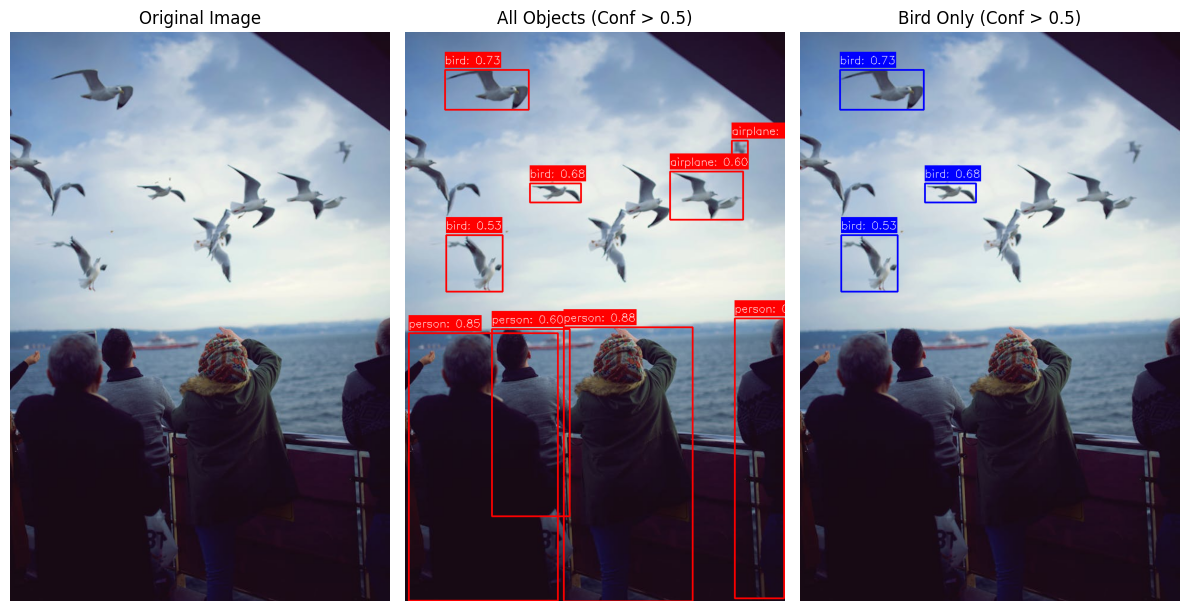

In [12]:
# ----------------------------------------
# Display images using matplotlib (side-by-side)
# ----------------------------------------

# This cell prepares and displays the three images (original, all objects, birds only) using Matplotlib
# - Converts images from BGR (OpenCV default) to RGB (Matplotlib default) format
# - Creates a figure and a grid of subplots (1 row, 3 columns)
# - Displays each image in its respective subplot with a title and turns off the axis labels
# - Adjusts the layout to prevent titles/labels from overlapping
# - Shows the plot

original_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
image_all_rgb = cv2.cvtColor(image_with_all_detections, cv2.COLOR_BGR2RGB)
image_bird_rgb = cv2.cvtColor(image_with_bird_detections, cv2.COLOR_BGR2RGB)

# Create a figure to hold the plots
plt.figure(figsize=(12, 6))

# Original Image subplot
plt.subplot(1, 3, 1) # (rows, columns, panel number)
plt.imshow(original_rgb)
plt.title("Original Image")
plt.axis("off") # Hide axes ticks and labels

# All Detections subplot
plt.subplot(1, 3, 2)
plt.imshow(image_all_rgb)
plt.title("All Objects (Conf > 0.5)")
plt.axis("off")

# Bird Only Detections subplot
plt.subplot(1, 3, 3)
plt.imshow(image_bird_rgb)
plt.title("Bird Only (Conf > 0.5)")
plt.axis("off")

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

# Export Processed Image

In [15]:
# ----------------------------------------
# Export Processed Image
# ----------------------------------------

# This cell saves the processed images (with bounding boxes) to a specified folder in your Google Drive

# Define the output folder path in Google Drive
result_folder = "/content/gdrive/MyDrive/Perform Object Detection (YOLOv8)/Processed_bird_images"

# Create the folder if it does not already exist
# os.makedirs creates directories recursively and does not raise an error if the directory already exists (exist_ok=True)
os.makedirs(result_folder, exist_ok=True)

# Convert RGB images back to BGR format
# OpenCV saves images in BGR format, but matplotlib uses RGB for display
# We need to convert the images back to BGR before saving them using cv2.imwrite
image_all_bgr = cv2.cvtColor(image_all_rgb, cv2.COLOR_RGB2BGR)
image_bird_bgr = cv2.cvtColor(image_bird_rgb, cv2.COLOR_RGB2BGR)

# Define output file names and paths by joining the folder path and filenames
all_objects_path = os.path.join(result_folder, "all_objects.jpg")
birds_only_path = os.path.join(result_folder, "birds_only.jpg")

# Save the images to the specified location in Google Drive
# cv2.imwrite saves the image to the given file path
cv2.imwrite(all_objects_path, image_all_bgr)
cv2.imwrite(birds_only_path, image_bird_bgr)

# Confirm successful export by printing the paths of the saved files
print(f"Exported: {all_objects_path}")
print(f"Exported: {birds_only_path}")

Exported: /content/gdrive/MyDrive/Perform Object Detection (YOLOv8)/Processed_bird_images/all_objects.jpg
Exported: /content/gdrive/MyDrive/Perform Object Detection (YOLOv8)/Processed_bird_images/birds_only.jpg


---
 ## Recommendations / Enhancements

| Suggestion                        | Benefit                                              |
| --------------------------------- | ---------------------------------------------------- |
| Add object count                  | Helps quantify detection results                     |
| Include legend                    | Clarifies color coding for boxes                     |
| Try `yolov8s.pt`                  | Improved accuracy with a slight performance tradeoff |
| Save plots via Matplotlib         | Export a side-by-side plot as a PNG/JPEG             |
| Add function-based implementation | For better modularity and reuse                      |


## Purpose and Learning Outcomes

This project demonstrates:

Application of pretrained YOLO models for visual recognition tasks.
Practical use of confidence-based filtering in computer vision.
Image annotation using OpenCV.
Data visualization and result presentation using Python.
Clean, modular coding with readable comments and structure.